In [1]:
#I create the shortcuts to my folders

data_dir = "../../Dades/Eudald/"
results_dir = "../../Figures/Eudald"

In [2]:
#Read the .json file to see the columns that we are interested in
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

vegueries = gpd.read_file(data_dir + "vegueries.json")

print(vegueries.columns)

Index(['CODIVEGUE', 'NOMVEGUE', 'CAPVEGUE', 'AREAV5000', 'geometry'], dtype='object')


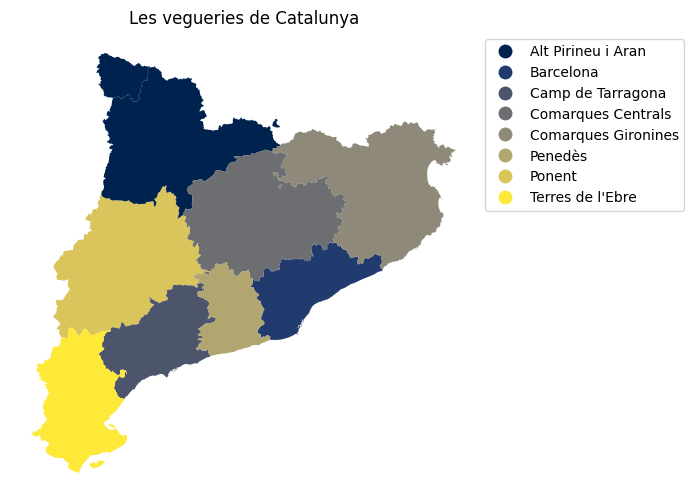

In [3]:
# Plot the raw .json to have a feeling how it is
ax = vegueries.plot(
    column='NOMVEGUE',  
    cmap='cividis',
    legend=True,        
    legend_kwds={
        'loc': 'upper left',  # Change legend position
        'bbox_to_anchor': (1, 1), 
    },
    figsize=(10, 6)        
)

plt.title("Les vegueries de Catalunya")
ax.axis('off')

plt.show()

In [4]:
#Here we have the old vegueries, before 2008 the data is given in this distribution, so depending on the year we will use different .jsonn files

vegueriesAnt = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-500000-20240705.json")
print(vegueriesAnt.columns)

Index(['CODICOMAR', 'NOMCOMAR', 'CAPCOMAR', 'AREAC5000', 'geometry'], dtype='object')


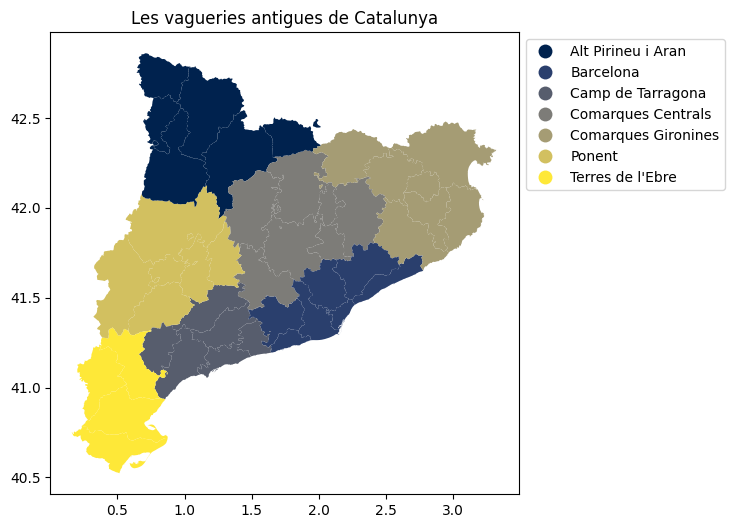

In [5]:
# Plot the .sjon
ax1 = vegueriesAnt.plot(
    column='CODICOMAR',  
    cmap='cividis',
    legend=True,           
    legend_kwds={
        'loc': 'upper left',  # Change legend position
        'bbox_to_anchor': (1, 1), 
    },
    figsize=(10, 6)         
)

# Customize and display the plot

plt.title("Les vagueries antigues de Catalunya")
ax.axis('off')

plt.show()

In [6]:
#Read the data across the years.

a1986 = pd.read_csv(data_dir + "1986.csv", delimiter=";")
a1991 = pd.read_csv(data_dir + "1991.csv", delimiter=";")
a1996 = pd.read_csv(data_dir + "1996.csv", delimiter=";")
a2001 = pd.read_csv(data_dir + "2001.csv", delimiter=";")
a2008 = pd.read_csv(data_dir + "2008.csv", delimiter=";")
a2011 = pd.read_csv(data_dir + "2011.csv", delimiter=";")
a2013 = pd.read_csv(data_dir + "2013.csv", delimiter=";")
a2018 = pd.read_csv(data_dir + "2018.csv", delimiter=";")



In [7]:
#Rename the columns with the name we want

a1986.rename(columns ={'Vegueries 1986':'CODICOMAR'}, inplace=True)
a1991.rename(columns ={'Vegueries 1991':'CODICOMAR'}, inplace=True)
a1996.rename(columns ={'Vegueries 1996':'CODICOMAR'}, inplace=True)
a2001.rename(columns ={'Vegueries 2001':'CODICOMAR'}, inplace=True)
a2008.rename(columns ={'Vegueries 2008':'CODICOMAR'}, inplace=True)
a2011.rename(columns ={'Vegueries 2011':'NOMVEGUE'}, inplace=True)
a2013.rename(columns ={'Vegueries 2013':'NOMVEGUE'}, inplace=True)
a2018.rename(columns ={'Vegueries 2018':'NOMVEGUE'}, inplace=True)

a2011


,NOMVEGUE,Entendre'l,Parlar-lo,Llegir-lo,Escriure'l
0,Barcelona,94.78,70.44,77.10,53.20
1,Alt Pirineu i Aran,96.82,80.65,84.17,61.30
2,Camp de Tarragona,95.10,73.99,79.67,57.10
3,Comarques Centrals,96.92,83.88,85.74,66.77
4,Comarques Gironines,95.07,77.04,80.48,60.66
5,Ponent,95.79,79.32,81.82,60.33
6,Terres de l'Ebre,97.05,81.05,81.97,55.49
7,Penedès,95.61,75.83,80.70,58.10


In [8]:
#Merge each year's data with the respective .json

merge1986 = vegueriesAnt.merge(a1986,on='CODICOMAR')
merge1991 = vegueriesAnt.merge(a1991,on='CODICOMAR')
merge1996 = vegueriesAnt.merge(a1996,on='CODICOMAR')
merge2001 = vegueriesAnt.merge(a2001,on='CODICOMAR')
merge2008 = vegueriesAnt.merge(a2008,on='CODICOMAR')
merge2011 = vegueries.merge(a2011,on='NOMVEGUE')
merge2013 = vegueries.merge(a2013,on='NOMVEGUE')
merge2018 = vegueries.merge(a2018,on='NOMVEGUE')

merge2011

,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry,Entendre'l,Parlar-lo,Llegir-lo,Escriure'l
0,00,Alt Pirineu i Aran,Vielha,633.059716,"MULTIPOLYGON (((0.7145 42.85981, 0.71354 42.86...",96.82,80.65,84.17,61.30
1,01,Barcelona,Barcelona,2350.158393,"MULTIPOLYGON (((2.17513 41.34935, 2.1753 41.35...",94.78,70.44,77.10,53.20
2,02,Comarques Gironines,Girona,5581.600761,"MULTIPOLYGON (((2.79206 41.66997, 2.79213 41.6...",95.07,77.04,80.48,60.66
3,03,Ponent,Ponent,5424.508094,"MULTIPOLYGON (((1.1676 42.11884, 1.16681 42.12...",95.79,79.32,81.82,60.33
4,04,Camp de Tarragona,Tarragona,2703.327145,"MULTIPOLYGON (((1.03706 41.0577, 1.03707 41.05...",95.10,73.99,79.67,57.10
5,05,Terres de l'Ebre,Tortosa,3306.194831,"MULTIPOLYGON (((0.64478 40.57413, 0.6448 40.57...",97.05,81.05,81.97,55.49
6,06,Alt Pirineu i Aran,*,5142.521823,"MULTIPOLYGON (((1.31969 41.98228, 1.32097 41.9...",96.82,80.65,84.17,61.30
7,07,Comarques Centrals,*,5216.877361,"MULTIPOLYGON (((1.45529 41.64254, 1.45506 41.6...",96.92,83.88,85.74,66.77
8,08,Penedès,*,1746.336894,"MULTIPOLYGON (((1.64362 41.19322, 1.64411 41.1...",95.61,75.83,80.70,58.10


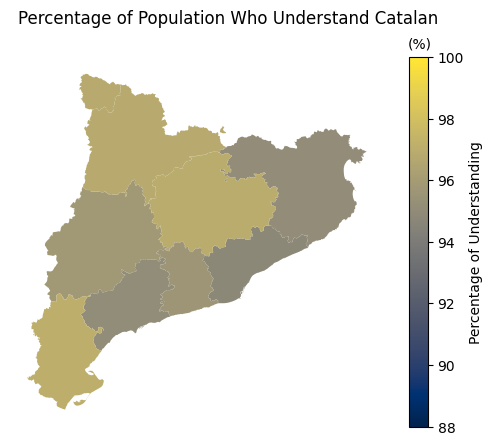

In [9]:
ax2011_1 = merge2011.plot(
    column='Entendre\'l', 
    cmap='cividis',
    legend=True,           
    vmin=88,
    vmax=100,
    legend_kwds={
        'label': "Percentage of Understanding", 
        'orientation': "vertical"
    }
)

ax2011_1.set_axis_off()
ax2011_1.get_figure().text(
    0.5, 0.95, 
    "Percentage of Population Who Understand Catalan", 
    ha='center', 
    fontsize=12
)

ax2011_1.get_figure().text(
    0.8, 0.9, 
    "(%)", 
    ha='center', 
    fontsize=10
)

plt.show()


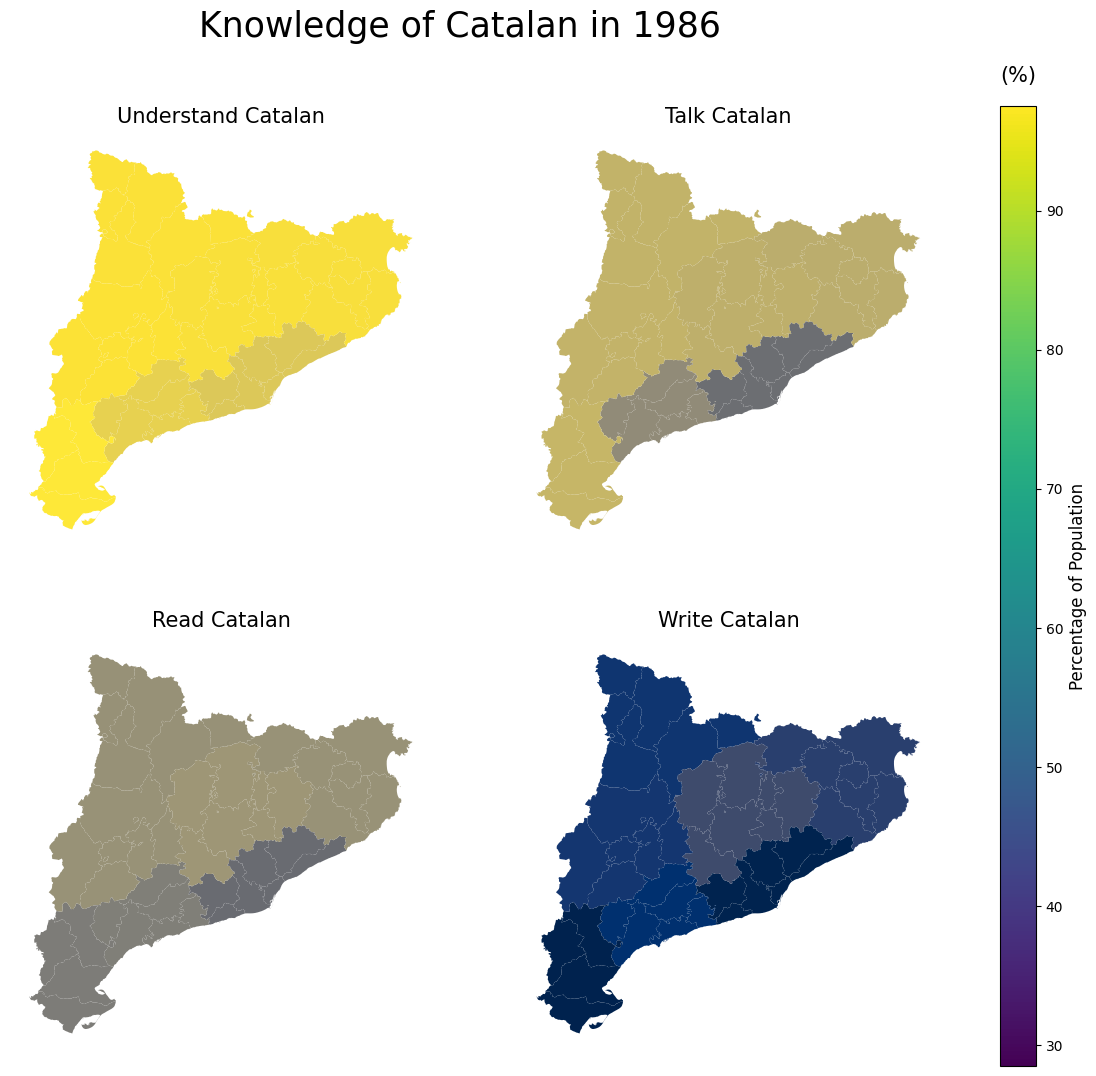

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the global min and max values across all columns for the color scale
vmin = min(merge1986['Entendre\'l'].min(), merge1986['Parlar-lo'].min(), merge1986['Llegir-lo'].min(), merge1986['Escriure\'l'].min())
vmax = max(merge1986['Entendre\'l'].max(), merge1986['Parlar-lo'].max(), merge1986['Llegir-lo'].min(), merge1986['Escriure\'l'].max())

# Create subplots (2 rows, 2 columns)
fig, ax1986 = plt.subplots(2, 2, figsize=(12, 12))

# Plot on each axis without legend (to avoid duplication of legends)
merge1986.plot(
    column='Entendre\'l',
    cmap='cividis',
    ax=ax1986[0, 0],
    legend=False,
    vmin=vmin,
    vmax=vmax
)
merge1986.plot(
    column='Parlar-lo',
    cmap='cividis',
    ax=ax1986[0, 1],
    legend=False,
    vmin=vmin,
    vmax=vmax
)
merge1986.plot(
    column='Llegir-lo',
    cmap='cividis',
    ax=ax1986[1, 0],
    legend=False,
    vmin=vmin,
    vmax=vmax
)
merge1986.plot(
    column='Escriure\'l',
    cmap='cividis',
    ax=ax1986[1, 1],
    legend=False,
    vmin=vmin,
    vmax=vmax
)

# Create a shared color legend using a ScalarMappable
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# Add a colorbar that spans the full height of the figure
cbar_ax = fig.add_axes([0.95, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)

# Add a label to the colorbar
cbar.set_label('Percentage of Population', fontsize=12)

# Add "(%)" just above the colorbar
fig.text(0.965, 0.92, '(%)', fontsize=15, ha='center')

# Set the main title for the figure
fig.suptitle('Knowledge of Catalan in 1986', fontsize=25)

# Adjust layout to avoid overlapping subplots
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax1986[0, 0].set_title('Understand Catalan', fontsize=15)
ax1986[0, 1].set_title('Talk Catalan', fontsize=15)
ax1986[1, 0].set_title('Read Catalan', fontsize=15)
ax1986[1, 1].set_title('Write Catalan', fontsize=15)


# Optional: set the axis limits to the extent of the data to ensure proper zooming
for ax in ax1986.flatten():
    ax.set_axis_off()

# Display the plot
plt.show()


In [11]:
#Since there are so many different numbers across the categories, I'll do it for sections instead so that we can apreaciate the differences.

In [ ]:
#People that understand Catalan

fig, axEntendre = plt.subplots(2, 4, figsize=(25, 15))

Mmin = 88
Mmax = 100

# Define the years for titles
years = [1986, 1991, 1996, 2001, 2008, 2011, 2013, 2018]

# List of datasets to iterate over
datasets = [merge1986, merge1991, merge1996, merge2001, merge2008, merge2011, merge2013, merge2018]

# Map each plot to specific subplot positions
positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

# Iterate over the positions and datasets
for (row, col), data, year in zip(positions, datasets, years):
    ax = axEntendre[row, col]
    data.plot(
        column="Entendre\'l",
        cmap="cividis", 
        ax=ax,
        legend=False,
        vmin=Mmin,
        vmax=Mmax
    )
    ax.set_title(f"{year}", fontsize=16)  
    ax.axis("off") 

# Adjust layout
fig.subplots_adjust(hspace=0, wspace=0.1, right=0.85)

# Create shared color legend
sm = plt.cm.ScalarMappable(cmap="cividis", norm=plt.Normalize(vmin=Mmin, vmax=Mmax))
sm.set_array([])

# Create colorbar with a custom position
cbar = fig.colorbar(sm, ax=axEntendre, orientation="vertical", fraction=0.02, pad=0.04)

# Add title to the colorbar and position it sideways
cbar.set_label("Percentage of Understanding Catalan", fontsize=12, labelpad=20)
cbar.ax.yaxis.set_label_position('left') 

# Add "(%)" just above the colorbar
fig.text(0.843, 0.75, "(%)", fontsize=15, ha='center', va='center')

plt.savefig("../../Figures/Eudald/UnderstandCatalan.png")


# Display the plot
plt.show()


In [ ]:
#People that Speak Catalan

fig, axParlar = plt.subplots(2, 4, figsize=(25, 15))

Mmin = 55
Mmax = 95

# Define the years for titles
years = [1986, 1991, 1996, 2001, 2008, 2011, 2013, 2018]

# List of datasets to iterate over
datasets = [merge1986, merge1991, merge1996, merge2001, merge2008, merge2011, merge2013, merge2018]

# Map each plot to specific subplot positions
positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

# Iterate over the positions and datasets
for (row, col), data, year in zip(positions, datasets, years):
    ax = axParlar[row, col]
    data.plot(
        column="Parlar-lo", 
        cmap="cividis",  
        ax=ax,
        legend=False,
        vmin=Mmin,
        vmax=Mmax
    )
    ax.set_title(f"{year}", fontsize=16)  
    ax.axis("off") 

# Adjust layout
fig.subplots_adjust(hspace=0, wspace=0.1, right=0.85)

# Create shared color legend
sm = plt.cm.ScalarMappable(cmap="cividis", norm=plt.Normalize(vmin=Mmin, vmax=Mmax))
sm.set_array([])

# Create colorbar with a custom position
cbar = fig.colorbar(sm, ax=axParlar, orientation="vertical", fraction=0.02, pad=0.04)

# Add title to the colorbar and position it sideways
cbar.set_label("Percentage of Speaking Catalan", fontsize=12, labelpad=20)
cbar.ax.yaxis.set_label_position('left') 

# Add "(%)" just above the colorbar
fig.text(0.843, 0.75, "(%)", fontsize=15, ha='center', va='center')

plt.savefig("../../Figures/Eudald/SpeakCatalan.png")

# Display the plot
plt.show()


In [ ]:
#People that Read Catalan

fig, axLlegir = plt.subplots(2, 4, figsize=(25, 15))

Mmin = 50
Mmax = 100

# Define the years for titles
years = [1986, 1991, 1996, 2001, 2008, 2011, 2013, 2018]

# List of datasets to iterate over
datasets = [merge1986, merge1991, merge1996, merge2001, merge2008, merge2011, merge2013, merge2018]

# Map each plot to specific subplot positions
positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

# Iterate over the positions and datasets
for (row, col), data, year in zip(positions, datasets, years):
    ax = axLlegir[row, col]
    data.plot(
        column="Llegir-lo", 
        cmap="cividis",  
        ax=ax,
        legend=False,
        vmin=Mmin,
        vmax=Mmax
    )
    ax.set_title(f"{year}", fontsize=16)  
    ax.axis("off") 

# Adjust layout
fig.subplots_adjust(hspace=0, wspace=0.1, right=0.85)

# Create shared color legend
sm = plt.cm.ScalarMappable(cmap="cividis", norm=plt.Normalize(vmin=Mmin, vmax=Mmax))
sm.set_array([])

# Create colorbar with a custom position
cbar = fig.colorbar(sm, ax=axLlegir, orientation="vertical", fraction=0.02, pad=0.04)

# Add title to the colorbar and position it sideways
cbar.set_label("Percentage of Reading Catalan", fontsize=12, labelpad=20)
cbar.ax.yaxis.set_label_position('left') 

# Add "(%)" just above the colorbar
fig.text(0.843, 0.75, "(%)", fontsize=15, ha='center', va='center')

plt.savefig("../../Figures/Eudald/ReadCatalan.png")

# Display the plot
plt.show()


In [ ]:
#People that Write Catalan

fig, axWritting = plt.subplots(2, 4, figsize=(25, 15))

Mmin = 20
Mmax = 90

# Define the years for titles
years = [1986, 1991, 1996, 2001, 2008, 2011, 2013, 2018]

# List of datasets to iterate over
datasets = [merge1986, merge1991, merge1996, merge2001, merge2008, merge2011, merge2013, merge2018]

# Map each plot to specific subplot positions
positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

# Iterate over the positions and datasets
for (row, col), data, year in zip(positions, datasets, years):
    ax = axWritting[row, col]
    data.plot(
        column="Escriure\'l", 
        cmap="cividis",  
        ax=ax,
        legend=False,
        vmin=Mmin,
        vmax=Mmax
    )
    ax.set_title(f"{year}", fontsize=16)  
    ax.axis("off") 

# Adjust layout
fig.subplots_adjust(hspace=0, wspace=0.1, right=0.85)

# Create shared color legend
sm = plt.cm.ScalarMappable(cmap="cividis", norm=plt.Normalize(vmin=Mmin, vmax=Mmax))
sm.set_array([])

# Create colorbar with a custom position
cbar = fig.colorbar(sm, ax=axWritting, orientation="vertical", fraction=0.02, pad=0.04)

# Add title to the colorbar and position it sideways
cbar.set_label("Percentage of Writting Catalan", fontsize=12, labelpad=20)
cbar.ax.yaxis.set_label_position('left') 

# Add "(%)" just above the colorbar
fig.text(0.843, 0.75, "(%)", fontsize=15, ha='center', va='center')

plt.savefig("../../Figures/Eudald/WriteCatalan.png")

# Display the plot
plt.show()
